# OLIMPIJSKE IGRE

Analiza dosežkov na olimpijskih igrah po državah in pogostosti posameznih športnih disciplin na olimpijskih igrah.

## Uvoz podatkov

In [54]:
import pandas as pd
%matplotlib inline
pd.options.display.max_rows = 10

MEDALJE_VSE = pd.read_csv("oi8.3_medalje_pregled.csv", index_col=0)
DISCIPLINE = pd.read_csv("oi9.3_discipline_pregled.csv", index_col=0)

In [55]:
vrsta = "summer"    # izberem lahko "summer" za poletne ali "winter" za zimske

In [ ]:
MEDALJE_VSE_IZBRANE = MEDALJE_VSE.filter(like=vrsta.capitalize()).astype(int).rename(columns=lambda x: x.replace(f"-{vrsta.capitalize()}", "")).loc[lambda df: ~(df == 0).all(axis=1)]
MEDALJE = MEDALJE_VSE.filter(like="Skupaj").astype(int).rename(columns=lambda x: x.replace("-Skupaj", "")).loc[lambda df: ~(df == 0).all(axis=1)]
MEDALJE_IZBRANE = MEDALJE_VSE_IZBRANE.filter(like="Skupaj").astype(int).rename(columns=lambda x: x.replace("-Skupaj", "")).loc[lambda df: ~(df == 0).all(axis=1)]
MEDALJE_IZBRANE2 = MEDALJE_VSE_IZBRANE.filter(like="Skupaj").astype(int).rename(columns=lambda x: x.split('-')[0]).loc[lambda df: ~(df == 0).all(axis=1)] #samo letnice, ne mesta

In [57]:
DISCIPLINE_SUMMER = DISCIPLINE.filter(like="Summer").astype(int).rename(columns=lambda x: x.replace("-Summer", "")).loc[lambda df: ~(df == 0).all(axis=1)]
DISCIPLINE_WINTER = DISCIPLINE.filter(like="Winter").astype(int).rename(columns=lambda x: x.replace("-Winter", "")).loc[lambda df: ~(df == 0).all(axis=1)]
DISCIPLINE_IZBRANE = DISCIPLINE.filter(like=vrsta.capitalize()).astype(int).rename(columns=lambda x: x.replace(f"-{vrsta.capitalize()}", "")).loc[lambda df: ~(df == 0).all(axis=1)]
DISCIPLINE2_IZBRANE = DISCIPLINE.filter(like=vrsta.capitalize()).astype(int).rename(columns=lambda x: x.split('-')[0]).loc[lambda df: ~(df == 0).all(axis=1)]

## Splošno

Število olimpijskih iger

In [58]:
# print(f"Skupaj olimpijskih iger: {len(DISCIPLINE.columns)}")                                # odvisno ali imam definirano DISCIPLINE_IZBRANE ali DISCIPLINE_SUMMER, _WINTER
# if vrsta == "summer":
#     print(f"Poletne olimpijske igre: {len(DISCIPLINE_IZBRANE.columns)}")
#     print(f"Zimske olimpijske igre: {len(DISCIPLINE.columns) - len(DISCIPLINE_IZBRANE.columns)}")
# else:
#     print(f"Poletne olimpijske igre: {len(DISCIPLINE.columns)} - {len(DISCIPLINE_IZBRANE.columns)}")
#     print(f"Zimske olimpijske igre: {len(DISCIPLINE.columns) - len(DISCIPLINE_IZBRANE.columns)}")

print(f"Skupaj olimpijskih iger: {len(DISCIPLINE.columns)}")
print(f"Poletne olimpijske igre: {len(DISCIPLINE_SUMMER.columns)}")
print(f"Zimske olimpijske igre: {len(DISCIPLINE_WINTER.columns)}")

Skupaj olimpijskih iger: 54
Poletne olimpijske igre: 30
Zimske olimpijske igre: 24


Lokacija olimpijskih iger

In [59]:
kraji = DISCIPLINE.columns.str.split("-", n=2).str[1].value_counts()
kraji_najvec_oi = kraji[kraji == kraji.max()]

print(f"Največrat so se Olimpijske igre odvijale v {", ".join(kraji_najvec_oi.index)} in sicer {kraji.max()}-krat.")     #sklanjanje!!

Največrat so se Olimpijske igre odvijale v Paris, London in sicer 3-krat.


In [60]:
mesto = "Tokyo"     # mesto za katero me zanima

if mesto.replace(" ", "_") not in kraji:
    print(f'Mesto {mesto} ni nikoli gostilo Olimpijskih iger.')
else:
    katera_leta = DISCIPLINE.columns[DISCIPLINE.columns.str.contains(f"-{mesto.replace(" ", "_")}-")].str.split("-", n=2).str[0]
    print(f"Mesto {mesto} je gostilo Olimpijske igre {kraji[mesto.replace(" ", "_")]}-krat, in sicer leta {', '.join(katera_leta)}.")

Mesto Tokyo je gostilo Olimpijske igre 2-krat, in sicer leta 1964, 2020.


In [61]:
mesto = "Ljubljana"     # mesto za katero me zanima

if mesto.replace(" ", "_") not in kraji:
    print(f'Mesto {mesto} ni nikoli gostilo Olimpijskih iger.')
else:
    katera_leta = DISCIPLINE.columns[DISCIPLINE.columns.str.contains(f"-{mesto.replace(" ", "_")}-")].str.split("-", n=2).str[0]
    print(f"Mesto {mesto} je gostilo Olimpijske igre {kraji[mesto.replace(" ", "_")]}-krat, in sicer leta {', '.join(katera_leta)}.")

Mesto Ljubljana ni nikoli gostilo Olimpijskih iger.


## Medalje

Koliko medalj je bilo podeljenih vsako leto

In [62]:
MEDALJE.loc['Skupaj'] = MEDALJE.drop('Skupaj', errors='ignore').sum()
MEDALJE_IZBRANE.loc['Skupaj'] = MEDALJE_IZBRANE.drop('Skupaj', errors='ignore').sum()
MEDALJE_IZBRANE2.loc['Skupaj'] = MEDALJE_IZBRANE2.drop('Skupaj', errors='ignore').sum()
vrsta_ih = "poletnih" if vrsta == "summer" else "zimskih"
vrsta_e = "poletne" if vrsta == "summer" else "zimske"

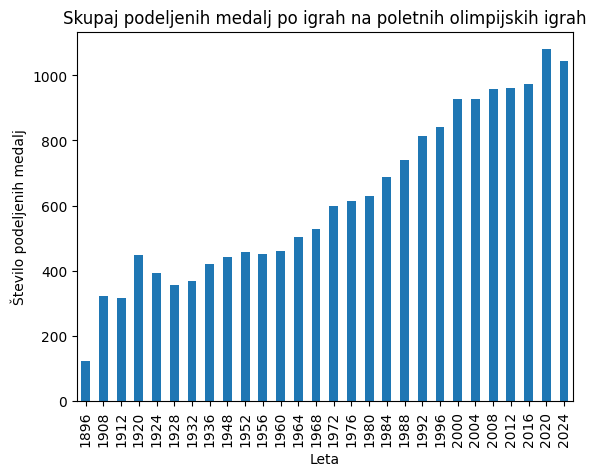

In [63]:
MEDALJE_IZBRANE2.loc['Skupaj'].plot.bar(title=f"Skupaj podeljenih medalj po igrah na {vrsta_ih} olimpijskih igrah", ylabel="Število podeljenih medalj", xlabel="Leta");

Katera država jih je tekom vseh let dobila največ in koliko, katero leto največ

In [64]:
MEDALJE = MEDALJE.drop(index='Skupaj', columns='Skupaj', errors='ignore')\
    .assign(Skupaj=lambda df: df.sum(axis=1)).sort_values(by="Skupaj", ascending=False)
MEDALJE_IZBRANE = MEDALJE_IZBRANE.drop(index='Skupaj', columns='Skupaj', errors='ignore')\
    .assign(Skupaj=lambda df: df.sum(axis=1)).sort_values(by="Skupaj", ascending=False)

In [65]:
print(f"Od leta {MEDALJE.columns[0].split('-')[0]} je na Olimpijskih igrah "
      f"skupno največ medalj dosegla {MEDALJE.index[0]} in sicer {MEDALJE.iloc[0, -1]}.\n"
      f"Največ medalj so osvojili leta {MEDALJE.iloc[0, :-1].idxmax().split('-')[0]} "
      f"v mestu {MEDALJE.iloc[0, :-1].idxmax().split('-')[1].replace('_', ' ')} "
      f"in sicer {MEDALJE.iloc[0, :-1].max()}.")

Od leta 1896 je na Olimpijskih igrah skupno največ medalj dosegla United States of America in sicer 2815.
Največ medalj so osvojili leta 1984 v mestu Los Angeles in sicer 174.


In [66]:
print(f"Od leta {MEDALJE_IZBRANE.columns[0].split('-')[0]} je na {vrsta_ih} olimpijskih igrah "
      f"skupno največ medalj dosegla {MEDALJE_IZBRANE.index[0]} in sicer {MEDALJE_IZBRANE.iloc[0, -1]}.\n"
      f"Največ medalj so osvojili leta {MEDALJE_IZBRANE.iloc[0, :-1].idxmax().split('-')[0]} "
      f"v mestu {MEDALJE_IZBRANE.iloc[0, :-1].idxmax().split('-')[1].replace("_", " ")} "
      f"in sicer {MEDALJE_IZBRANE.iloc[0, :-1].max()}.")

Od leta 1896 je na poletnih olimpijskih igrah skupno največ medalj dosegla United States of America in sicer 2485.
Največ medalj so osvojili leta 1984 v mestu Los Angeles in sicer 174.


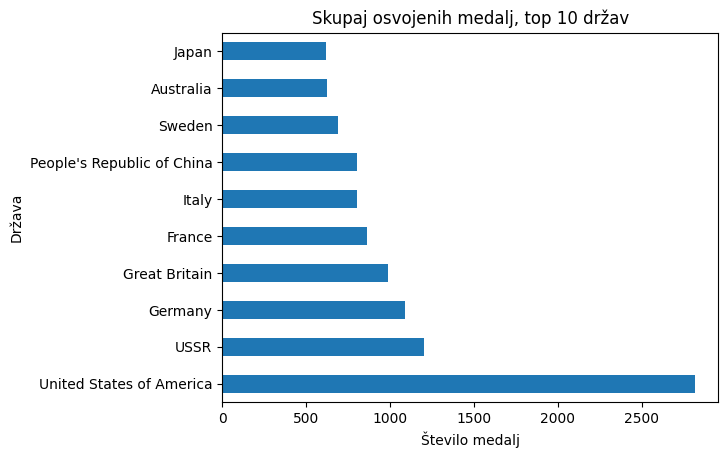

In [67]:
MEDALJE['Skupaj'].head(10).plot.barh(title="Skupaj osvojenih medalj, top 10 držav", xlabel="Število medalj", ylabel="Država");

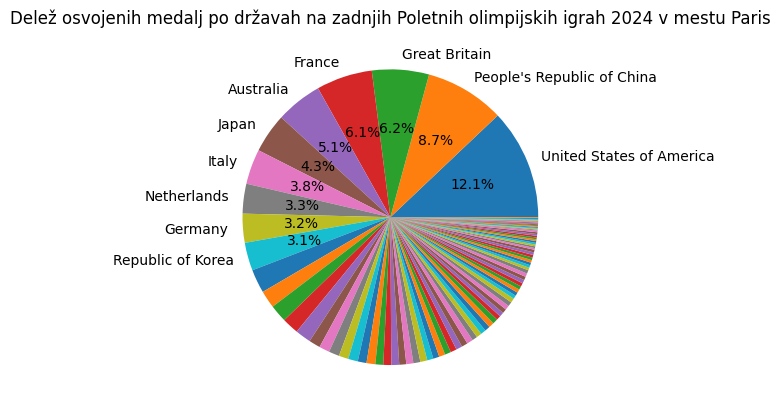

In [68]:
# zadnje = MEDALJE_IZBRANE.columns[-2]
# MEDALJE_IZBRANE.sort_values(by=zadnje, ascending=False)[zadnje].plot.pie(
#     title=f"Delež osvojenih medalj po državah na zadnjih {vrsta_ih.capitalize()} olimpijskih igrah {zadnje.split('-')[0]} v mestu {zadnje.split('-')[1]}", ylabel="",
#     labels=[ime if pct >= 3 else '' 
#         for ime, pct in zip(MEDALJE_IZBRANE.sort_values(by=zadnje, ascending=False).index, 
#             100 * MEDALJE_IZBRANE.sort_values(by=zadnje, ascending=False)[zadnje] / MEDALJE_IZBRANE[zadnje].sum())], 
#     autopct=lambda pct: f"{pct:.1f}%" if pct >= 3 else "");

medalje_zadnjeigre = MEDALJE[[MEDALJE.columns[-2]]].loc[lambda df: df[df.columns[0]] != 0]
medalje_zadnjeigre.sort_values(by=medalje_zadnjeigre.columns[0], ascending=False).plot.pie(
    y=medalje_zadnjeigre.columns[0],
    title=f"Delež osvojenih medalj po državah na zadnjih {vrsta_ih.capitalize()} olimpijskih igrah {medalje_zadnjeigre.columns[0].split('-')[0]} v mestu {medalje_zadnjeigre.columns[0].split('-')[1]}",
    ylabel="",
    legend=False,
    labels=[ime if pct >= 3 else '' 
        for ime, pct in zip(medalje_zadnjeigre.sort_values(by=medalje_zadnjeigre.columns[0], ascending=False).index,
            100 * medalje_zadnjeigre.sort_values(by=medalje_zadnjeigre.columns[0], ascending=False)[medalje_zadnjeigre.columns[0]] / medalje_zadnjeigre[medalje_zadnjeigre.columns[0]].sum())],
    autopct=lambda pct: f"{pct:.1f}%" if pct >= 3 else "");

Katere države so skupno dosegle več medalj kot povprečje držav, ki so osvojile vsaj eno medaljo

In [69]:
MEDALJE_BOLJSE = MEDALJE[MEDALJE['Skupaj'] >= MEDALJE['Skupaj'].mean()]
MEDALJE_BOLJSE.iloc[:, [-1]]

,Skupaj
Država,
United States of America,2815
USSR,1204
Germany,1087
Great Britain,987
France,863
...,...
Brazil,170
Belgium,166
New Zealand,163


In [70]:
medalje_zadnjeigre = MEDALJE[[MEDALJE.columns[-2]]].loc[lambda df: df[df.columns[0]] != 0]
boljse_od_povprecja = medalje_zadnjeigre.loc[lambda df: df[df.columns[0]] >= df[df.columns[0]].mean()].sort_values(by=medalje_zadnjeigre.columns[0], ascending=False)
boljse_od_povprecja

,2024-Paris-Summer
Država,
United States of America,126
People's Republic of China,91
Great Britain,65
France,64
Australia,53
...,...
Hungary,19
Spain,18
Uzbekistan,13


## Discipline

Koliko različnih disciplin je bilo na olimpijskih igrah

In [71]:
print(f"Število poletnih disciplin: {len(DISCIPLINE_SUMMER)}")
print(f"Število zimskih disciplin: {len(DISCIPLINE_WINTER)}")
print(f"Skupno število disciplin: {len(DISCIPLINE)}")
na_obeh = set(DISCIPLINE_SUMMER.index) & set(DISCIPLINE_WINTER.index)
print(f"Discipline, prisotne na poletnih in zimskih igrah: {', '.join(sorted(na_obeh))}")
print(f"Skupno število unikatnih disciplin: {len(set(DISCIPLINE_SUMMER.index) | set(DISCIPLINE_WINTER.index))}")
# opomba: zimske olimpijske igre so se pojavile šele leta 1924, zato so pred tem bile nevrsta_ih zimske discipline (figure skating, ice hockey) na poletnih

Število poletnih disciplin: 72
Število zimskih disciplin: 17
Skupno število disciplin: 87
Discipline, prisotne na poletnih in zimskih igrah: Figure skating, Ice Hockey
Skupno število unikatnih disciplin: 87


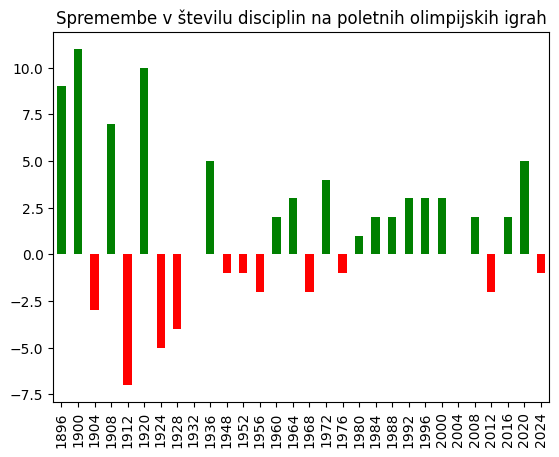

In [72]:
stevilo_disciplin_na_leto = DISCIPLINE2_IZBRANE.sum(axis=0).astype(int)
spremembe = stevilo_disciplin_na_leto.diff().fillna(stevilo_disciplin_na_leto.iloc[0]).astype(int)

barve = ['red' if x < 0 else 'green' for x in spremembe]
spremembe.plot(kind="bar", title=f"Spremembe v številu disciplin na {vrsta_ih} olimpijskih igrah", color=barve);

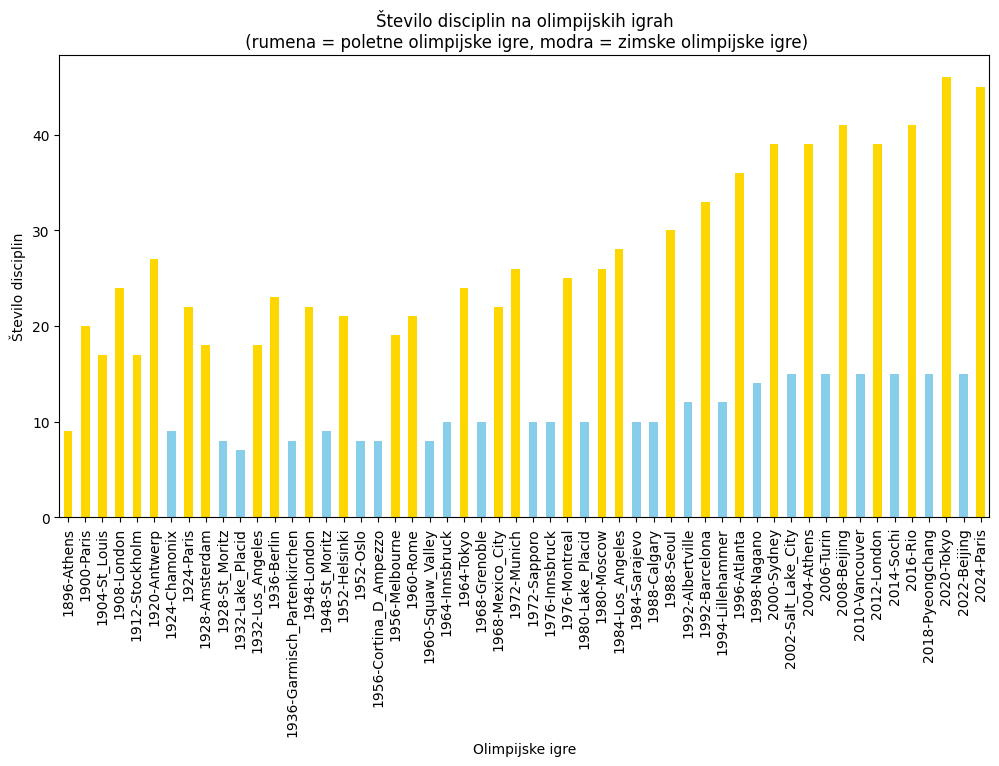

In [73]:
stevilo_disciplin = DISCIPLINE.sum(axis=0).astype(int)
barve = ['gold' if 'Summer' in igra else 'skyblue' for igra in stevilo_disciplin.index]
stevilo_disciplin.index = stevilo_disciplin.index.str.rsplit('-', n=1).str[0]

stevilo_disciplin.plot(kind='bar', color=barve, figsize=(12,6),
                       title="Število disciplin na olimpijskih igrah\n (rumena = poletne olimpijske igre, modra = zimske olimpijske igre)",
                       ylabel="Število disciplin", xlabel="Olimpijske igre");

Pogostost disciplin

In [74]:
DISCIPLINE = DISCIPLINE.drop(columns='Skupaj', errors='ignore')\
    .assign(Skupaj=lambda df: df.sum(axis=1)).sort_values(by="Skupaj", ascending=False)
DISCIPLINE_IZBRANE = DISCIPLINE_IZBRANE.drop(columns='Skupaj', errors='ignore')\
    .assign(Skupaj=lambda df: df.sum(axis=1)).sort_values(by="Skupaj", ascending=False)

In [75]:
# top_5 = DISCIPLINE["Skupaj"].nlargest(5).min()  # vrednost 10. največje
# rezultat = DISCIPLINE.loc[DISCIPLINE["Skupaj"] >= top_5]
# rezultat.iloc[:, [-1]]

In [76]:
max_pojavitev = DISCIPLINE["Skupaj"].max()
najbolj_pogoste = DISCIPLINE.loc[DISCIPLINE["Skupaj"] == max_pojavitev].index.tolist()
print(f"Najbolj pogoste discipline so: {', '.join(najbolj_pogoste)}.")

Najbolj pogoste discipline so: Athletics, Swimming, Fencing.


In [77]:
max_pojavitev = DISCIPLINE_IZBRANE["Skupaj"].max()
najbolj_pogoste = DISCIPLINE_IZBRANE.loc[DISCIPLINE_IZBRANE["Skupaj"] == max_pojavitev].index.tolist()
print(f"Najbolj pogoste {vrsta_e} discipline so: {', '.join(najbolj_pogoste)}.")

Najbolj pogoste poletne discipline so: Athletics, Fencing, Swimming.


## Rezultati Združenih držav Amerike